# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress


# Import API key
from api_keys import weather_api_key


# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "Imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="


# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)



## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

611

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# set lists for the dataframe
city_two = []
cloudinesses = []
dates = []
humidities = []
lats = []
lngs = []
max_temps = []
wind_speeds = []
countries = []

# set initial count quantities for organization
count_one = 0
set_one = 1

# loops for creating dataframe columns
for city in cities:
    try:
        response = requests.get(query_url + city.replace(" ","&")).json()
        cloudinesses.append(response['clouds']['all'])
        countries.append(response['sys']['country'])
        dates.append(response['dt'])
        humidities.append(response['main']['humidity'])
        lats.append(response['coord']['lat'])
        lngs.append(response['coord']['lon'])
        max_temps.append(response['main']['temp_max'])
        wind_speeds.append(response['wind']['speed'])
        if count_one > 48:
            count_one = 1
            set_one += 1
            city_two.append(city)
        else:
            count_one += 1
            city_two.append(city)
        print(f"Processing Record {count_one} of Set {set_one} | {city}")
    except Exception:
        print("City not found. Skipping...")
print("------------------------------\nData Retrieval Complete\n------------------------------")

Processing Record 1 of Set 1 | sabha
Processing Record 2 of Set 1 | bambous virieux
Processing Record 3 of Set 1 | vaini
Processing Record 4 of Set 1 | hilo
Processing Record 5 of Set 1 | hobart
Processing Record 6 of Set 1 | smoky lake
Processing Record 7 of Set 1 | puerto ayora
Processing Record 8 of Set 1 | port lincoln
City not found. Skipping...
Processing Record 9 of Set 1 | albany
City not found. Skipping...
Processing Record 10 of Set 1 | sitka
Processing Record 11 of Set 1 | rikitea
Processing Record 12 of Set 1 | mitsamiouli
Processing Record 13 of Set 1 | cape town
Processing Record 14 of Set 1 | mys shmidta
Processing Record 15 of Set 1 | urengoy
Processing Record 16 of Set 1 | barrow
Processing Record 17 of Set 1 | mataura
Processing Record 18 of Set 1 | georgetown
Processing Record 19 of Set 1 | villa carlos paz
Processing Record 20 of Set 1 | coquimbo
Processing Record 21 of Set 1 | alofi
Processing Record 22 of Set 1 | laguna
Processing Record 23 of Set 1 | busselton
Pr

Processing Record 40 of Set 4 | port hedland
Processing Record 41 of Set 4 | merauke
Processing Record 42 of Set 4 | bon accord
Processing Record 43 of Set 4 | port macquarie
Processing Record 44 of Set 4 | cabedelo
Processing Record 45 of Set 4 | orichi
Processing Record 46 of Set 4 | hualmay
Processing Record 47 of Set 4 | klaksvik
Processing Record 48 of Set 4 | souillac
Processing Record 49 of Set 4 | bathsheba
Processing Record 1 of Set 5 | lincoln
Processing Record 2 of Set 5 | rancho palos verdes
Processing Record 3 of Set 5 | sebring
Processing Record 4 of Set 5 | beyneu
Processing Record 5 of Set 5 | ancud
City not found. Skipping...
Processing Record 6 of Set 5 | coahuayana
Processing Record 7 of Set 5 | stonehouse
Processing Record 8 of Set 5 | sao filipe
Processing Record 9 of Set 5 | hovd
City not found. Skipping...
Processing Record 10 of Set 5 | marrakesh
Processing Record 11 of Set 5 | chimbote
Processing Record 12 of Set 5 | gilgit
City not found. Skipping...
Processin

Processing Record 25 of Set 8 | mantua
Processing Record 26 of Set 8 | chokurdakh
Processing Record 27 of Set 8 | college
City not found. Skipping...
Processing Record 28 of Set 8 | dalhousie
City not found. Skipping...
Processing Record 29 of Set 8 | beloha
Processing Record 30 of Set 8 | novopokrovka
Processing Record 31 of Set 8 | aksarka
Processing Record 32 of Set 8 | kaitangata
Processing Record 33 of Set 8 | sao felix do xingu
Processing Record 34 of Set 8 | porto torres
Processing Record 35 of Set 8 | salalah
Processing Record 36 of Set 8 | yataity
Processing Record 37 of Set 8 | biskamzha
Processing Record 38 of Set 8 | norman wells
Processing Record 39 of Set 8 | tigil
Processing Record 40 of Set 8 | prince george
Processing Record 41 of Set 8 | atasu
Processing Record 42 of Set 8 | nyurba
Processing Record 43 of Set 8 | hwange
Processing Record 44 of Set 8 | astana
Processing Record 45 of Set 8 | doha
Processing Record 46 of Set 8 | seoul
Processing Record 47 of Set 8 | nizh

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:

# create a dictionary for establishing dataframe
weather_dict = {
    "City":city_two,
    "Cloudiness":cloudinesses,
    "Country":countries,
    "Date":dates,
    "Humidity":humidities,
    "Lat":lats,
    "Lng":lngs,
    "Max Temp":max_temps,
    "Wind Speed":wind_speeds
}

weather_dict

{'City': ['sabha',
  'bambous virieux',
  'vaini',
  'hilo',
  'hobart',
  'smoky lake',
  'puerto ayora',
  'port lincoln',
  'albany',
  'sitka',
  'rikitea',
  'mitsamiouli',
  'cape town',
  'mys shmidta',
  'urengoy',
  'barrow',
  'mataura',
  'georgetown',
  'villa carlos paz',
  'coquimbo',
  'alofi',
  'laguna',
  'busselton',
  'lebu',
  'nanortalik',
  'hobyo',
  'manggar',
  'port hardy',
  'rocha',
  'taoudenni',
  'olafsvik',
  'punta arenas',
  'adelaide',
  'esperance',
  'yellowknife',
  'pucallpa',
  'ushuaia',
  'bluff',
  'poum',
  'washington',
  'mar del plata',
  'saskylakh',
  'caravelas',
  'kuusamo',
  'wanning',
  'ponnani',
  'bowen',
  'mahebourg',
  'khatanga',
  'geraldton',
  'saint-philippe',
  'shache',
  'asau',
  'riyadh',
  'hermanus',
  'cayenne',
  'santa maria',
  'balkhash',
  'basti',
  'new norfolk',
  'husavik',
  'alice springs',
  'jamestown',
  'yulara',
  'carnarvon',
  'daru',
  'thinadhoo',
  'kapaa',
  'hithadhoo',
  'kulhudhuffushi',


In [5]:
# establish dataframe
weather_dataframe = pd.DataFrame(weather_dict)

In [6]:
# show the top of the dataframe
weather_dataframe.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,sabha,100,LY,1579920670,23,27.04,14.43,53.78,9.55
1,bambous virieux,75,MU,1579920098,100,-20.26,57.41,80.01,18.34
2,vaini,40,TO,1579920105,74,-21.20,-175.20,84.20,13.87
3,hilo,90,US,1579920107,69,19.73,-155.09,77.00,9.17
4,hobart,100,AU,1579919993,36,-42.88,147.33,75.20,18.34


In [7]:
weather_dataframe.count()

City          542
Cloudiness    542
Country       542
Date          542
Humidity      542
Lat           542
Lng           542
Max Temp      542
Wind Speed    542
dtype: int64

In [8]:
weather_dataframe.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,sabha,100,LY,1579920670,23,27.04,14.43,53.78,9.55
1,bambous virieux,75,MU,1579920098,100,-20.26,57.41,80.01,18.34
2,vaini,40,TO,1579920105,74,-21.20,-175.20,84.20,13.87
3,hilo,90,US,1579920107,69,19.73,-155.09,77.00,9.17
4,hobart,100,AU,1579919993,36,-42.88,147.33,75.20,18.34


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

In [9]:
time.strftime('%x')

'01/24/20'

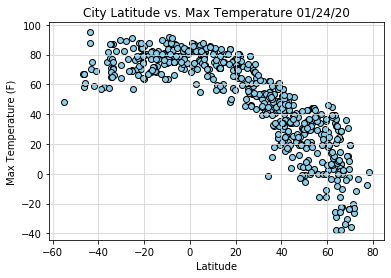

In [10]:

plt.scatter(weather_dataframe["Lat"],weather_dataframe["Max Temp"],edgecolors="black",facecolors="skyblue")
plt.title(f"City Latitude vs. Max Temperature {time.strftime('%x')}")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("Figures/fig1.png")
plt.show()

#### Latitude vs. Humidity Plot

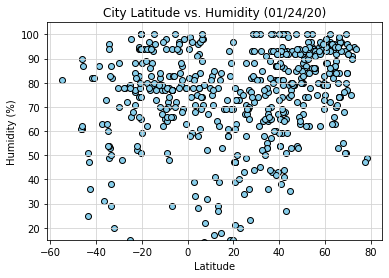

In [11]:

plt.scatter(weather_dataframe["Lat"],weather_dataframe["Humidity"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Humidity (%s)" % time.strftime('%x') )
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.ylim(15,105)
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("Figures/fig2.png")
plt.show()

#### Latitude vs. Cloudiness Plot

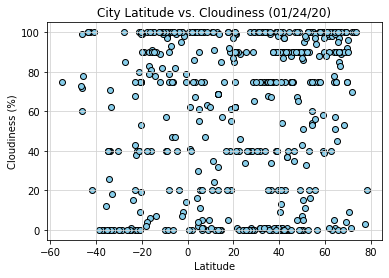

In [12]:
plt.scatter(weather_dataframe["Lat"],weather_dataframe["Cloudiness"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime('%x') )               
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("Figures/fig3.png")
plt.show()

#### Latitude vs. Wind Speed Plot

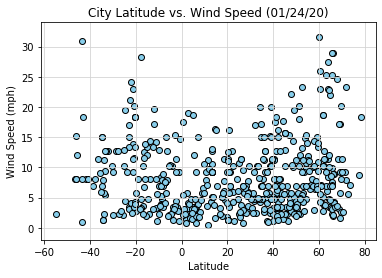

In [13]:
plt.scatter(weather_dataframe["Lat"],weather_dataframe["Wind Speed"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime('%x') )
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.ylim(-2,34)
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("Figures/fig4.png")
plt.show()

## Linear Regression

In [ ]:
#Northern Hemisphere (greater than or equal to 0 degrees latitude)
#Southern Hemisphere (less than 0 degrees latitude)

In [14]:
#north_df = weather_dataframe[weather_dataframe["Lat"] >= 0]
#north_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,sabha,100,LY,1579920670,23,27.04,14.43,53.78,9.55
3,hilo,90,US,1579920107,69,19.73,-155.09,77.00,9.17
5,smoky lake,40,US,1579920672,87,38.65,-76.65,48.99,10.29
6,puerto ayora,20,ES,1579920108,93,36.59,-6.23,53.60,9.17
8,albany,75,US,1579920109,68,42.60,-73.97,36.00,5.70


In [15]:
#south_df = weather_dataframe[weather_dataframe["Lat"] < 0]
#south_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
1,bambous virieux,75,MU,1579920098,100,-20.26,57.41,80.01,18.34
2,vaini,40,TO,1579920105,74,-21.20,-175.20,84.20,13.87
4,hobart,100,AU,1579919993,36,-42.88,147.33,75.20,18.34
7,port lincoln,100,CD,1579920098,77,-7.03,29.76,74.95,7.61
10,rikitea,43,PF,1579920104,76,-23.12,-134.97,78.58,13.42


In [16]:
#Define x and y values
x_values = weather_dataframe['Lat']
y_values = weather_dataframe['Max Temp']


# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
print(regress_values)

0       46.961862
1       83.224759
2       83.945417
3       52.566128
4      100.566551
          ...    
537     22.206493
538     48.157847
539     57.495735
540     63.782326
541     57.495735
Name: Lat, Length: 542, dtype: float64


In [17]:
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = -0.77x +67.69


The r-squared is: -0.8177515422002759


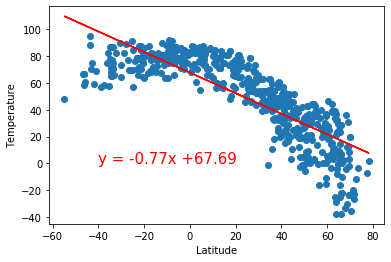

In [18]:
# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.annotate(line_eq,(-40,0),fontsize=15,color="red")

# Print r square value
print(f"The r-squared is: {rvalue}")

# Show plot
plt.show()

In [34]:
# Create Northern and Southern Hemisphere DataFrames
south_df = weather_dataframe[weather_dataframe["Lat"] < 0]    
north_df = weather_dataframe[weather_dataframe["Lat"] >= 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is : -1.25


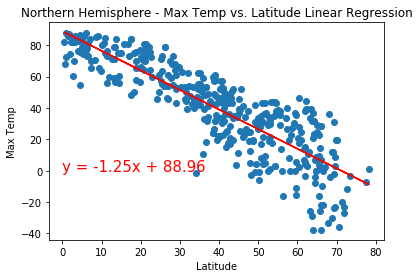

In [36]:
def linear_agression(x,y):
    print(f'The r-squared is : {round(linregress(x, y)[0],2)}')
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
    plt.scatter(x, y)
    plt.plot(x,regress_values,'r-')
    return line_eq

# Define a fuction for annotating
def annotate(line_eq, a, b):
    plt.annotate(line_eq,(a,b),fontsize=15,color='red')



# Call an function #1
equation = linear_agression(north_df['Lat'], north_df['Max Temp'])
# Call an function #2
annotate(equation, 0, 0)
# Set a title
plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression')
# Set xlabel
plt.xlabel('Latitude')
# Set ylabel
plt.ylabel('Max Temp')
# Save the figure
plt.savefig('Northern Hemisphere - Max Temp vs. Latitude Linear Regression.png')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is : 0.24


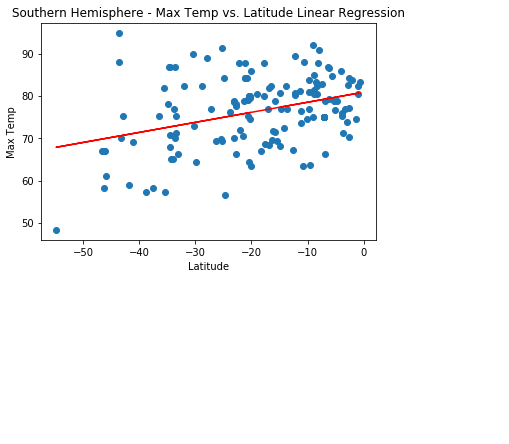

In [37]:
def linear_agression(x,y):
    print(f'The r-squared is : {round(linregress(x, y)[0],2)}')
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
    plt.scatter(x, y)
    plt.plot(x,regress_values,'r-')
    return line_eq

# Define a fuction for annotating
def annotate(line_eq, a, b):
    plt.annotate(line_eq,(a,b),fontsize=15,color='red')



# Call an function #1
equation = linear_agression(south_df['Lat'], south_df['Max Temp'])
# Call an function #2
annotate(equation, 0, 0)
# Set a title
plt.title('Southern Hemisphere - Max Temp vs. Latitude Linear Regression')
# Set xlabel
plt.xlabel('Latitude')
# Set ylabel
plt.ylabel('Max Temp')
# Save the figure
plt.savefig('Southern Hemisphere - Max Temp vs. Latitude Linear Regression.png')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is : 0.42


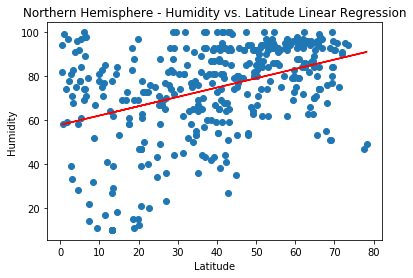

In [38]:
def linear_agression(x,y):
    print(f'The r-squared is : {round(linregress(x, y)[0],2)}')
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
    plt.scatter(x, y)
    plt.plot(x,regress_values,'r-')
    return line_eq

# Define a fuction for annotating
def annotate(line_eq, a, b):
    plt.annotate(line_eq,(a,b),fontsize=15,color='red')



# Call an function #1
equation = linear_agression(north_df['Lat'], north_df['Humidity'])
# Call an function #2
annotate(equation, 0, 0)
# Set a title
plt.title('Northern Hemisphere - Humidity vs. Latitude Linear Regression')
# Set xlabel
plt.xlabel('Latitude')
# Set ylabel
plt.ylabel('Humidity')
# Save the figure
plt.savefig('Northern Hemisphere - Humidity vs. Latitude Linear Regression.png')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is : 0.42


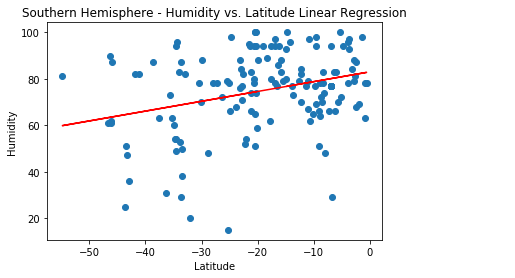

In [39]:
def linear_agression(x,y):
    print(f'The r-squared is : {round(linregress(x, y)[0],2)}')
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
    plt.scatter(x, y)
    plt.plot(x,regress_values,'r-')
    return line_eq

# Define a fuction for annotating
def annotate(line_eq, a, b):
    plt.annotate(line_eq,(a,b),fontsize=15,color='red')



# Call an function #1
equation = linear_agression(south_df['Lat'], south_df['Humidity'])
# Call an function #2
annotate(equation, 0, 0)
# Set a title
plt.title('Southern Hemisphere - Humidity vs. Latitude Linear Regression')
# Set xlabel
plt.xlabel('Latitude')
# Set ylabel
plt.ylabel('Humidity')
# Save the figure
plt.savefig('Southern Hemisphere - Humidity vs. Latitude Linear Regression.png')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is : 0.42


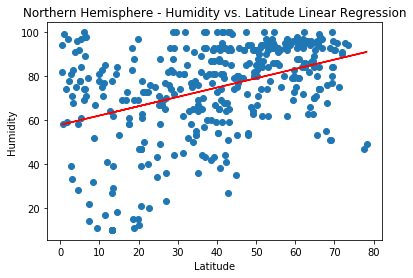

In [43]:
def linear_agression(x,y):
    print(f'The r-squared is : {round(linregress(x, y)[0],2)}')
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
    plt.scatter(x, y)
    plt.plot(x,regress_values,'r-')
    return line_eq

# Define a fuction for annotating
def annotate(line_eq, a, b):
    plt.annotate(line_eq,(a,b),fontsize=15,color='red')



# Call an function #1
equation = linear_agression(north_df['Lat'], north_df['Humidity'])
# Call an function #2
annotate(equation, 0, 0)
# Set a title
plt.title('Northern Hemisphere - Humidity vs. Latitude Linear Regression')
# Set xlabel
plt.xlabel('Latitude')
# Set ylabel
plt.ylabel('Humidity')
# Save the figure
plt.savefig('Northern Hemisphere - Humidity vs. Latitude Linear Regression.png')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is : 0.96


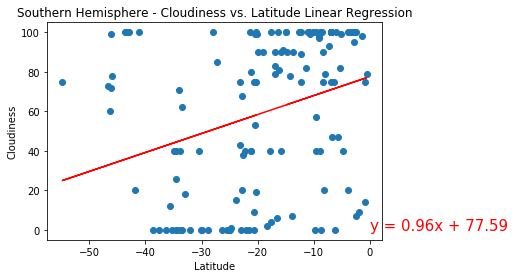

In [40]:
def linear_agression(x,y):
    print(f'The r-squared is : {round(linregress(x, y)[0],2)}')
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
    plt.scatter(x, y)
    plt.plot(x,regress_values,'r-')
    return line_eq

# Define a fuction for annotating
def annotate(line_eq, a, b):
    plt.annotate(line_eq,(a,b),fontsize=15,color='red')



# Call an function #1
equation = linear_agression(south_df['Lat'], south_df['Cloudiness'])
# Call an function #2
annotate(equation, 0, 0)
# Set a title
plt.title('Southern Hemisphere - Cloudiness vs. Latitude Linear Regression')
# Set xlabel
plt.xlabel('Latitude')
# Set ylabel
plt.ylabel('Cloudiness')
# Save the figure
plt.savefig('Southern Hemisphere - Cloudiness vs. Lattude Linear Regression.png')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is : 0.09


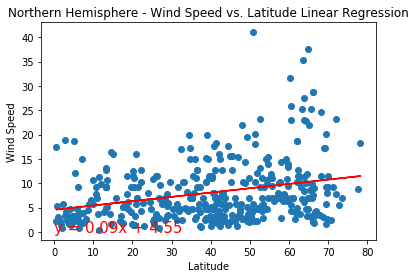

In [42]:
def linear_agression(x,y):
    print(f'The r-squared is : {round(linregress(x, y)[0],2)}')
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
    plt.scatter(x, y)
    plt.plot(x,regress_values,'r-')
    return line_eq

# Define a fuction for annotating
def annotate(line_eq, a, b):
    plt.annotate(line_eq,(a,b),fontsize=15,color='red')



# Call an function #1
equation = linear_agression(north_df['Lat'], north_df['Wind Speed'])
# Call an function #2
annotate(equation, 0, 0)
# Set a title
plt.title('Northern Hemisphere - Wind Speed vs. Latitude Linear Regression')
# Set xlabel
plt.xlabel('Latitude')
# Set ylabel
plt.ylabel('Wind Speed')
# Save the figure
plt.savefig('Northern Hemisphere - Wind Speed vs. Latitude Linear Regression.png')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is : -0.08


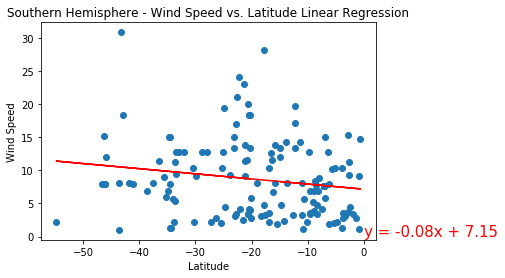

In [41]:
def linear_agression(x,y):
    print(f'The r-squared is : {round(linregress(x, y)[0],2)}')
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
    plt.scatter(x, y)
    plt.plot(x,regress_values,'r-')
    return line_eq

# Define a fuction for annotating
def annotate(line_eq, a, b):
    plt.annotate(line_eq,(a,b),fontsize=15,color='red')



# Call an function #1
equation = linear_agression(south_df['Lat'], south_df['Wind Speed'])
# Call an function #2
annotate(equation, 0, 0)
# Set a title
plt.title('Southern Hemisphere - Wind Speed vs. Latitude Linear Regression')
# Set xlabel
plt.xlabel('Latitude')
# Set ylabel
plt.ylabel('Wind Speed')
# Save the figure
plt.savefig('Southern Hemisphere - Wind Speed vs. Latitude Linear Regression.png')